# Day 6: Prepare For Modeling by Pre-Processing Data
* The model's performance depends on the data it is used to train.
* To build a robust model, ensure that the data is properly prepared and optimized for the machine learning algorithm.

## Pre-processing techniques available in scikit-learn
### Handling Missing Data:
* **SimpleImputer:** This class provides strategies for imputing missing values in the dataset, such as replacing missing values with the mean, median, or most frequent value along each column.

### Feature Scaling:
* **StandardScaler:** This class standardizes features by removing the mean and scaling them to unit variance.
* **MinMaxScaler:** This class scales features to a specified range, typically between 0 a* nd 1.
* **RobustScaler:** This class scales features using statistics that are robust to outliers by removing the median and scaling data according to the interquartile range.

### Normalzation:
* **Normalizer:** This class normalizes samples individually to have unit norm (i.e., the sum of squares of the elements in a row is 1).

### Encoding Categorical Features:
* **OneHotEncoder:** This class encodes categorical integer features as one-hot num* eric arrays.
* **LabelEncoder:** This class encodes target labels with values between 0 and `n_classes-1`.

### Binarization:
* **Binarizer:** This class binarizes numerical features based on a threshold, transforming them into binary values (0 or 1).

### Polinomial Features:
* **PolynomialFeatures:** This class generates polynomial features by transforming the input data into polynomial combinations of the features, up to a specified degree.

### Function Transformation:
* **FunctionTransformer:** This class applies a specified function to each element or to a set of features.

### Dimensionality Reduction:
* **PCA (Principal Component Analysis):** This class performs dimensionality reduction by projecting the data onto a lower-dimensional subspace while preserving as much variance as possible.
* **TruncatedSVD (Singular Value Decomposition):** This class performs linear dimensionality reduction by truncating the input matrix to the specified number of dimensions using truncated singular value decomposition.

## Transforming data in scikit-learn
In scikit-learn, many pre-processing techniques involve a two-step process: 
* fitting the transformer to the data to learn parameters (e.g., mean and standard deviation for scaling) 
* and then transforming the data based on those parameters. 

How it works:
* **Fit:** In the fitting step, the transformer analyzes the training data and learns any parameters necessary for transformation. For example, when using `StandardScaler`, the mean and standard deviation of each feature are computed during the fitting step.
* **Transform:** In the transformation step, the fitted transformer applies the learned parameters to transform the data. For example, when using `StandardScaler`, each feature is scaled according to the mean and standard deviation computed during the fit step.
* **Combined Fit-And-Transform:** Some transformers in scikit-learn offer a combined fit-and-transform method, which performs both fitting and transformation in a single step. This can be more convenient, especially when dealing with small datasets or when performing cross-validation.

In [1]:
# Apply standardization
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# Create a DataFrame
df = pandas.read_csv(url, names = colnames) 

In [19]:
# Summary statistics
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


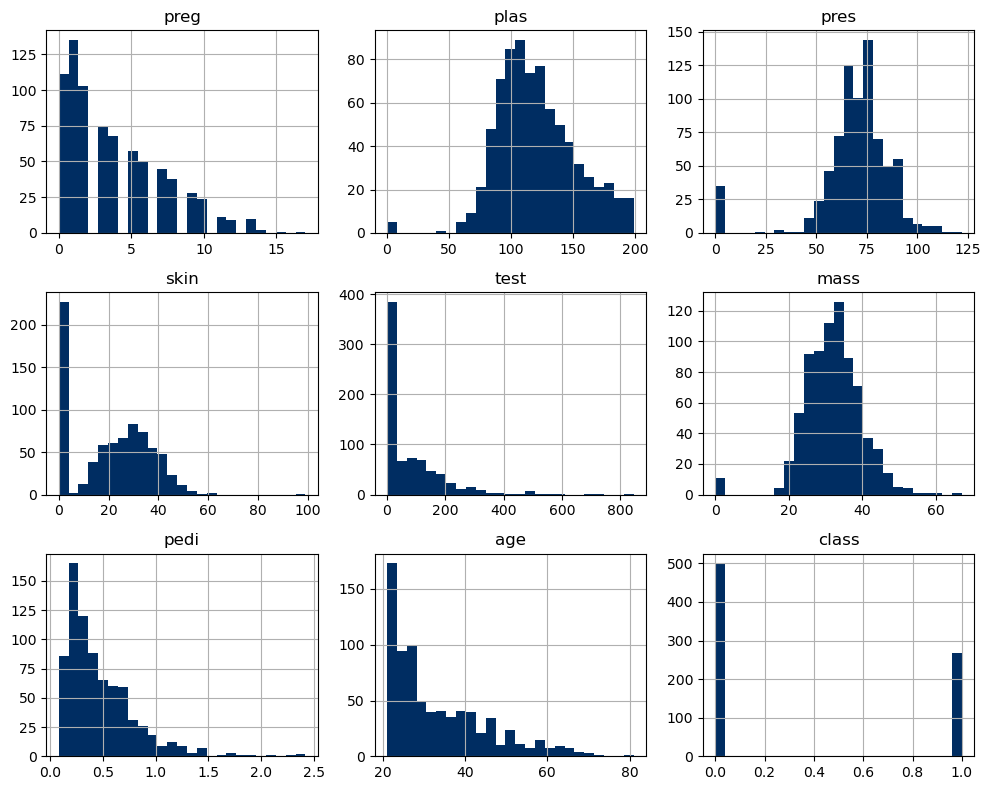

In [20]:
# Plot the distribution
df.hist(bins=25, grid = True, figsize = (10,8), color = '#002D62')
plt.tight_layout()
plt.show()

In [4]:
# Extracts the data from the DataFrame and stores it in a NumPy array.
array = df.values

In [25]:
# Separate array into features and target variables
X = array[:,0:8] # Select all rows and columns 0 to 7
Y = array[:,8] # Select all rows and column 8

In [26]:
# Fit and transform
# Create a StandardScaler instance and fit the scaler to the training data
scaler = StandardScaler().fit(X)

# Transform the training data based on the fitted parameters
rescaledX = scaler.transform(X)

In [27]:
# Summarize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


*** 
When you transform your raw data, it's important to understand how the transformed data differs from the raw data:
* **Summary Statistics:** Compute summary statistics such as mean, standard deviation, minimum, maximum, etc., for both the raw and transformed data. Compare these statistics to understand how the distribution of the data has changed after transformation.
* **Visual Inspection:** Plot histograms, boxplots, or other visualizations for both the raw and transformed data. Visualizing the distributions can provide insights into how the data has been transformed 


Summary Statistics for Raw Data:
             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750

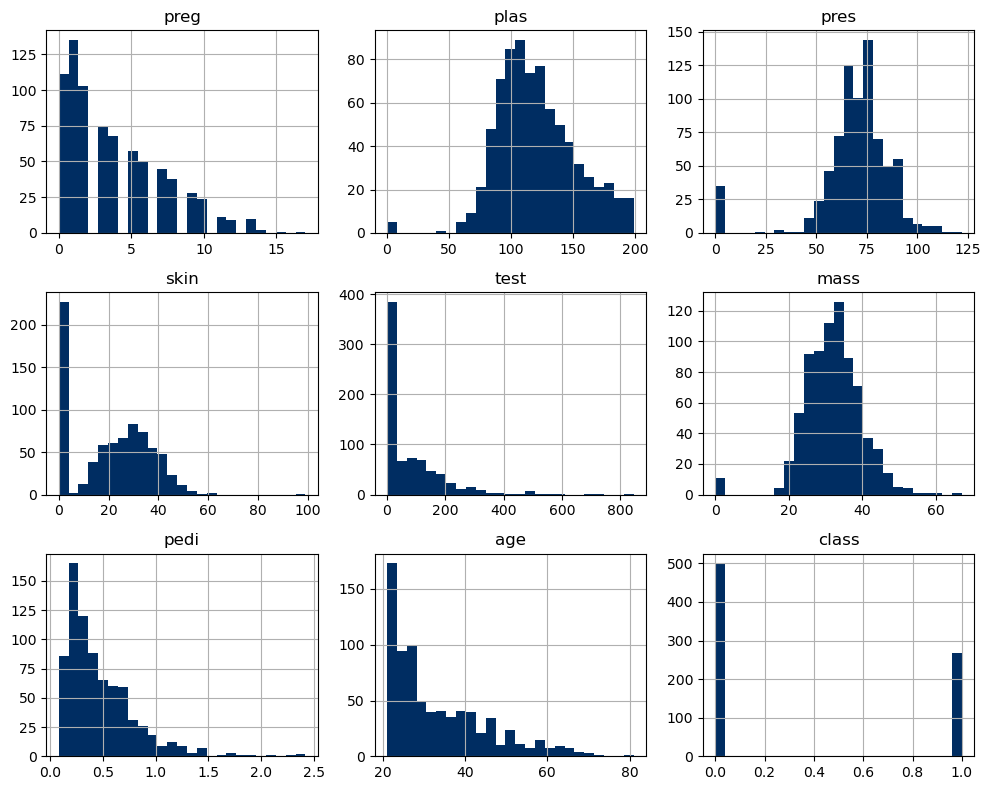


Histograms for Transformed Data:


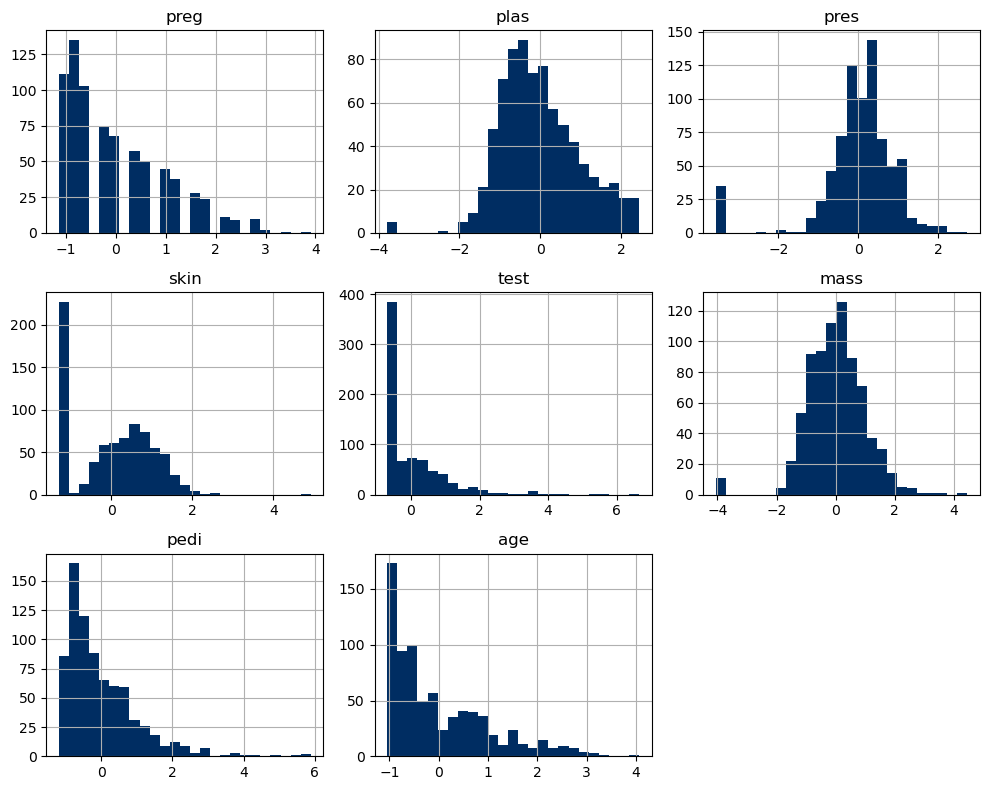

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the raw data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(url, names=colnames)

# Display summary statistics for the raw data
print("Summary Statistics for Raw Data:")
print(df.describe())

# Separate features (X) and target variable (Y)
X = df.drop(columns=['class'])  # Features
Y = df['class']  # Target variable

# Apply standardization to features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert transformed data back to DataFrame for summary statistics
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display summary statistics for the transformed data
print("\nSummary Statistics for Transformed Data:")
print(X_scaled_df.describe())

# Visual inspection: Histograms for raw data
print("\nHistograms for Raw Data:")
df.hist(bins=25, grid=True, figsize=(10, 8), color='#002D62')
plt.tight_layout()
plt.show()

# Visual inspection: Histograms for transformed data
print("\nHistograms for Transformed Data:")
X_scaled_df.hist(bins=25, grid=True, figsize=(10, 8), color='#002D62')
plt.tight_layout()
plt.show()